In [17]:
# ML Model Training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

In [18]:
# Load cleaned data
data_path = Path("../src/taxipred/data/taxi_trip_pricing_cleaned.csv")
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst rows:")
df.head()

Dataset shape: (545, 11)
Columns: ['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

First rows:


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
2,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
3,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
4,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914


In [19]:
# Separate features (X) and target (y)
X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:")
print(X.columns.tolist())

Features shape: (545, 10)
Target shape: (545,)

Feature columns:
['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']


In [20]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:")
print(numerical_features)
print(f"\nCategorical features:")
print(categorical_features)

Numerical features:
['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']

Categorical features:
['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']


In [21]:
# Encode categorical features
X_encoded = X.copy()

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    
    print(f"{col}: {X[col].unique()} -> {X_encoded[col].unique()}")

print(f"\nX_encoded shape: {X_encoded.shape}")
X_encoded.head()

Time_of_Day: ['Morning' 'Evening' 'Afternoon' 'Night'] -> [2 1 0 3]
Day_of_Week: ['Weekday' 'Weekend'] -> [0 1]
Traffic_Conditions: ['Low' 'High' 'Medium'] -> [1 0 2]
Weather: ['Clear' 'Rain' 'Snow'] -> [0 1 2]

X_encoded shape: (545, 10)


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82
1,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27
2,8.64,0,1,2.0,2,0,2.55,1.71,0.48,89.33
3,41.79,3,1,3.0,0,0,4.60,1.77,0.11,86.95
4,9.91,1,0,2.0,0,0,2.32,1.26,0.34,41.72


In [22]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train/test split: {X_train.shape[0]/len(X_encoded)*100:.1f}% / {X_test.shape[0]/len(X_encoded)*100:.1f}%")

Training set: 436 samples
Test set: 109 samples
Train/test split: 80.0% / 20.0%


In [46]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit scaler on training data and transform both train and test
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"\nExample before scaling:")
print(X_train[numerical_features].head(2))
print(f"\nExample after scaling:")
print(X_train_scaled[numerical_features].head(2))


Example before scaling:
    Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
46              6.86              2.0       2.93         1.18   
93             43.99              2.0       2.64         0.96   

    Per_Minute_Rate  Trip_Duration_Minutes  
46             0.18                 102.45  
93             0.29                  74.71  

Example after scaling:
    Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
46         -1.333195        -0.459315  -0.683659    -0.057912   
93          1.289400        -0.459315  -1.019500    -0.571776   

    Per_Minute_Rate  Trip_Duration_Minutes  
46        -0.985320               1.289804  
93        -0.019336               0.432469  


In [43]:
print("MODEL 1: Linear Regression")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Metrics
lr_metrics = {
    'Model': 'Linear Regression',
    'Train MAE': mean_absolute_error(y_train, y_pred_train_lr),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_lr),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_lr)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_lr)),
    'Train R²': r2_score(y_train, y_pred_train_lr),
    'Test R²': r2_score(y_test, y_pred_test_lr)
}

for key, value in lr_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")

MODEL 1: Linear Regression
Train MAE: 5.4197
Test MAE: 5.6024
Train RMSE: 7.0797
Test RMSE: 7.0791
Train R²: 0.9105
Test R²: 0.9060


In [42]:
print("MODEL 2: Random Forest")


rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Metrics
rf_metrics = {
    'Model': 'Random Forest',
    'Train MAE': mean_absolute_error(y_train, y_pred_train_rf),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_rf),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_rf)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_rf)),
    'Train R²': r2_score(y_train, y_pred_train_rf),
    'Test R²': r2_score(y_test, y_pred_test_rf)
}

for key, value in rf_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")

MODEL 2: Random Forest
Train MAE: 1.5845
Test MAE: 3.8663
Train RMSE: 2.1185
Test RMSE: 4.9426
Train R²: 0.9920
Test R²: 0.9542


In [41]:
print("MODEL 3: Gradient Boosting")


gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Metrics
gb_metrics = {
    'Model': 'Gradient Boosting',
    'Train MAE': mean_absolute_error(y_train, y_pred_train_gb),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_gb),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_gb)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_gb)),
    'Train R²': r2_score(y_train, y_pred_train_gb),
    'Test R²': r2_score(y_test, y_pred_test_gb)
}

for key, value in gb_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")

MODEL 3: Gradient Boosting
Train MAE: 0.3520
Test MAE: 2.9867
Train RMSE: 0.4693
Test RMSE: 3.8501
Train R²: 0.9996
Test R²: 0.9722


In [39]:
results_df = pd.DataFrame([lr_metrics, rf_metrics, gb_metrics])
results_df = results_df.set_index('Model')


print("Model comparison:")

print(results_df.round(4))

Model comparison:
                   Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  \
Model                                                                     
Linear Regression     5.4197    5.6024      7.0797     7.0791    0.9105   
Random Forest         1.5845    3.8663      2.1185     4.9426    0.9920   
Gradient Boosting     0.3520    2.9867      0.4693     3.8501    0.9996   

                   Test R²  
Model                       
Linear Regression   0.9060  
Random Forest       0.9542  
Gradient Boosting   0.9722  


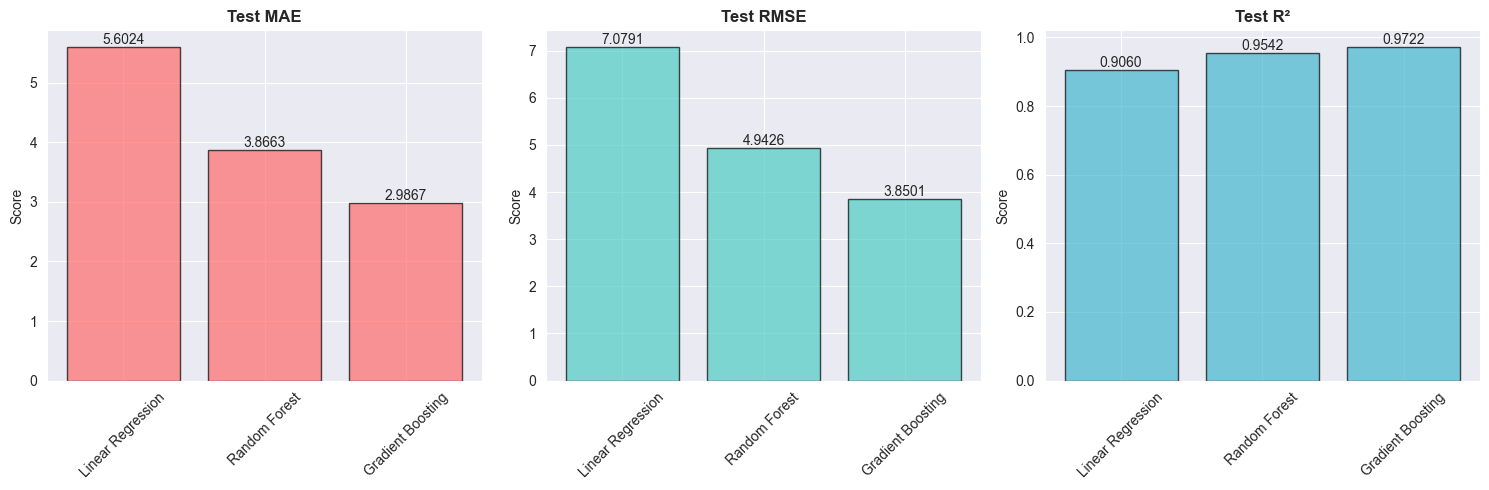

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['Test MAE', 'Test RMSE', 'Test R²']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics_to_plot):
    values = results_df[metric].values
    models = results_df.index
    
    axes[idx].bar(models, values, color=colors[idx], alpha=0.7, edgecolor='black')
    axes[idx].set_title(metric, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Score')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(values):
        axes[idx].text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
# Use Gradient Boosting as our final model
final_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Scale all data
X_all_scaled = X_encoded.copy()
scaler_final = StandardScaler()
X_all_scaled[numerical_features] = scaler_final.fit_transform(X_encoded[numerical_features])

In [34]:
# Export model and preprocessing objects
models_dir = Path("../models")
models_dir.mkdir(exist_ok=True)

# Save model
model_path = models_dir / "taxi_price_model.joblib"
joblib.dump(final_model, model_path)

# Save scaler
scaler_path = models_dir / "scaler.joblib"
joblib.dump(scaler_final, scaler_path)

# Save label encoders
encoders_path = models_dir / "label_encoders.joblib"
joblib.dump(label_encoders, encoders_path)

# Save feature names for later use
feature_names = {
    'all_features': X_all_scaled.columns.tolist(),
    'numerical_features': numerical_features,
    'categorical_features': categorical_features
}
feature_path = models_dir / "feature_names.joblib"
joblib.dump(feature_names, feature_path)

['..\\models\\feature_names.joblib']